<a href="https://colab.research.google.com/github/arsalan993/AI-based-Image-search-/blob/master/Prediction_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Module**


---



---




## Load the Drive helper and mount

In [5]:
from google.colab import drive
from tqdm import tqdm

drive.mount('/content/drive',force_remount=True)
%cd drive/My\ Drive/Image_recommender_via_desciption

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Image_recommender_via_desciption


### Installing Sentence Transformer and Annoy

In [2]:
!pip install -U sentence-transformers annoy

     |████████████████████████████████| 71kB 3.3MB/s 
     |████████████████████████████████| 645kB 10.7MB/s 
     |████████████████████████████████| 778kB 24.1MB/s 
     |████████████████████████████████| 890kB 34.5MB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 
     |████████████████████████████████| 1.1MB 38.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.3-cp36-none-any.whl size=97299 sha256=11502abcd3758dd700e1c1c5d3a1c3198892aaa17f592fd0eec3b7edc48d8232
  Stored in directory: /root/.cache/pip/wheels/75/d6/0a/cab163b21d0597cc1580bc344487b11ad405e0d1d314725f2b
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297324 sha256=7d68336d97596a0cb0e2d62fe12ae44b0219e1fec05331a1a3e381752e5c0f9e
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=99aea5fb7f18d1

In [7]:
from sentence_transformers import SentenceTransformer
from annoy import AnnoyIndex
import pandas as pd

In [6]:
lang_model = SentenceTransformer('bert_lang_model/sentence_transformers/public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-large-nli-mean-tokens.zip/')

In [14]:
path = pd.read_csv("model/val_path.csv")
u = AnnoyIndex(1024, 'angular') # Equivalent to dimension of language model vector
u.load('model/encoding.ann')

True

In [17]:
path['cat'].unique()

array(['go-kart', 'reel', 'refrigerator, icebox',
       'bathtub, bathing tub, bath, tub', 'teddy, teddy bear',
       'sewing machine', 'beer bottle', 'school bus',
       'grasshopper, hopper', 'swimming trunks, bathing trunks', 'banana',
       'miniskirt, mini', 'king penguin, Aptenodytes patagonica', 'broom',
       'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
       'triumphal arch', 'sports car, sport car', 'military uniform',
       'neck brace', 'obelisk',
       'American lobster, Northern lobster, Maine lobster, Homarus americanus',
       'European fire salamander, Salamandra salamandra', 'viaduct',
       'remote control, remote', 'volleyball', 'Yorkshire terrier',
       'moving van', 'ice cream, icecream', 'pill bottle', 'comic book',
       'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
       'trilobite', 'picket fence, paling', 'rocking chair, rocker',
       

In [170]:
def plot_images(input_sen):
  input_enc = lang_model.encode(input_sen).tolist()[0]
  return_index = u.get_nns_by_vector(input_enc, 16, search_k=-1, include_distances=False)
  return_path = path[path.index.isin(return_index)]['img_path'].to_list()
  %matplotlib inline
  from matplotlib import pyplot as plt
  plt.rcParams["figure.figsize"] = (16,4)
  f, axarr = plt.subplots(2,8)
  curr_row = 0
  for index,img in enumerate(return_path):
      a = plt.imread(img)

      # find the column by taking the current index modulo 3
      col = index % 8
      # plot on relevant subplot
      axarr[curr_row,col].imshow(a)
      if col == 7:
          # we have finished the current row, so increment row counter
          curr_row += 1


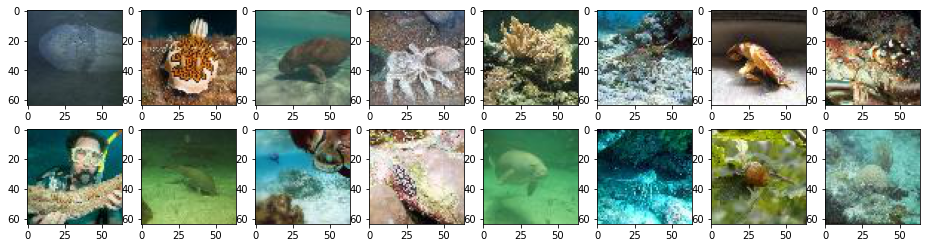

In [171]:
plot_images("small fishes underwater")

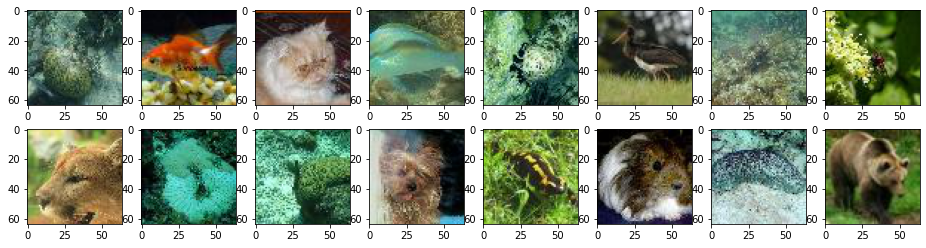

In [172]:
plot_images("small fishes underwater eating coral")

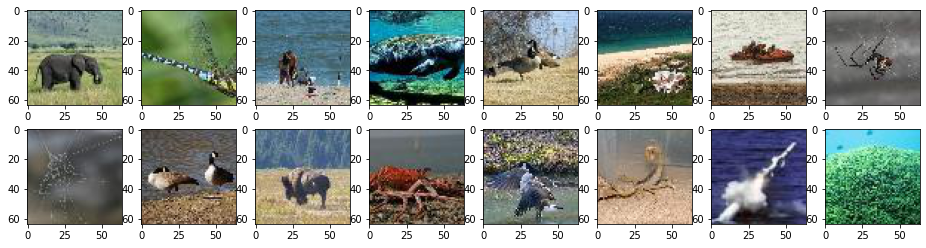

In [173]:
plot_images('biggest mamal ever')

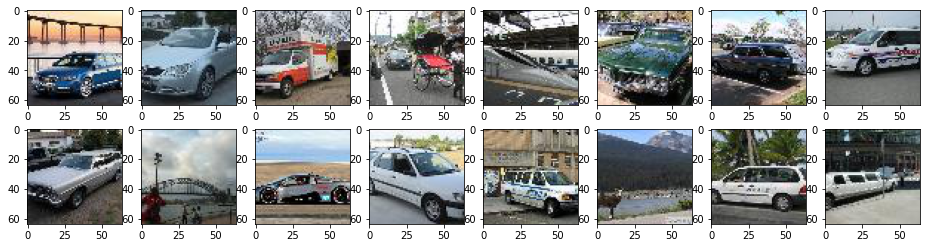

In [174]:
plot_images('family car')

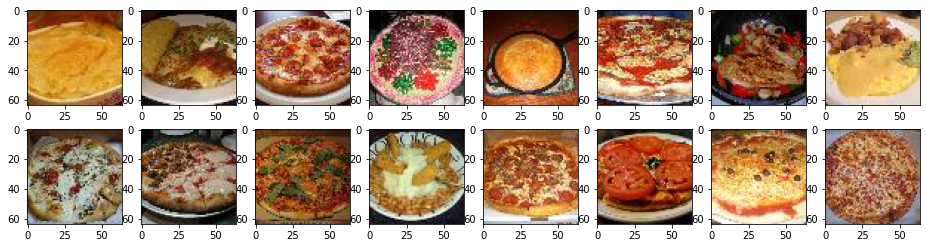

In [175]:
plot_images('bread and cheese')